### 1. Load the data and check out the structure about the data set. 

In [3]:
import pandas as pd

stores = pd.read_csv('stores.csv')
train = pd.read_csv('train.csv')

train.info

<bound method DataFrame.info of         Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1    2010/2/5      24924.50      False
1           1     1   2010/2/12      46039.49       True
2           1     1   2010/2/19      41595.55      False
3           1     1   2010/2/26      19403.54      False
4           1     1    2010/3/5      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98   2012/9/28        508.37      False
421566     45    98   2012/10/5        628.10      False
421567     45    98  2012/10/12       1061.02      False
421568     45    98  2012/10/19        760.01      False
421569     45    98  2012/10/26       1076.80      False

[421570 rows x 5 columns]>

We can see that there are a total of 421,570 rows in the train file, and there are no missing values in each column.

In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010/2/5,24924.50,False
1,1,1,2010/2/12,46039.49,True
2,1,1,2010/2/19,41595.55,False
3,1,1,2010/2/26,19403.54,False
4,1,1,2010/3/5,21827.90,False


In [5]:
# Check out columns and rows.
print(stores.shape)

stores.head()

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### 2. Compare the data details:

a) Total weekly and monthly sales

b) Analyze sales by store. Explore the differences in sales for different store types and sizes.

c) Analyze sales by department. 

In [6]:
# Transfer the format of the time.
train['Date'] = pd.to_datetime(train['Date'])

# Extract the month and week number.
train['month'] = train['Date'].dt.month
train['week'] = train['Date'].dt.week

train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,month,week
0,1,1,2010-02-05,24924.50,False,2,5
1,1,1,2010-02-12,46039.49,True,2,6
2,1,1,2010-02-19,41595.55,False,2,7
3,1,1,2010-02-26,19403.54,False,2,8
4,1,1,2010-03-05,21827.90,False,3,9


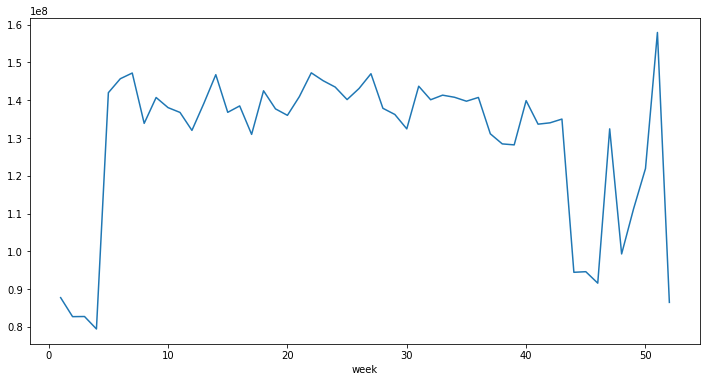

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Divide sales by week. 
train.groupby('week')['Weekly_Sales'].sum().plot(figsize=(12,6))
plt.show()

In [8]:
# Divide by month.
train.groupby('month')['Weekly_Sales'].sum()

month
1     3.325984e+08
2     5.687279e+08
3     5.927859e+08
4     6.468598e+08
5     5.571256e+08
6     6.226299e+08
7     6.500010e+08
8     6.130902e+08
9     5.787612e+08
10    5.847848e+08
11    4.130157e+08
12    5.768386e+08
Name: Weekly_Sales, dtype: float64

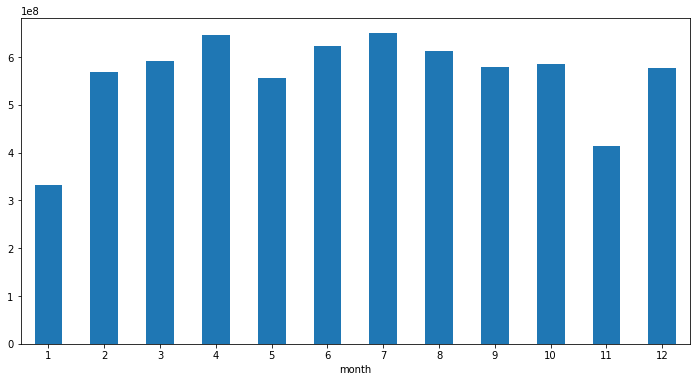

In [9]:
# Divide by month.
train.groupby('month')['Weekly_Sales'].sum().plot(figsize=(12,6),kind='bar',rot=360)
plt.show()

Sales were the lowest in January and the highest in July.

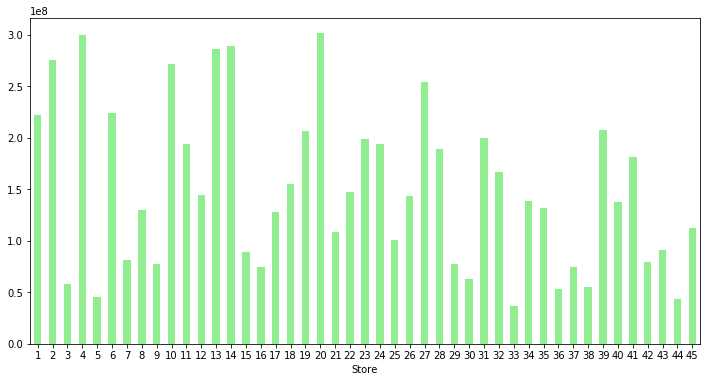

In [10]:
# Devide the sales by stores. 
train.groupby('Store')['Weekly_Sales'].sum().plot(figsize=(12,6),kind='bar',color='lightgreen',rot=360)
plt.show()

We can see that there is a big gap between the sales of each store, and the No. 20 store has the highest sales.

In [11]:
# Merge the data
data = pd.merge(train,stores,on='Store')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,month,week,Type,Size
0,1,1,2010-02-05,24924.50,False,2,5,A,151315
1,1,1,2010-02-12,46039.49,True,2,6,A,151315
2,1,1,2010-02-19,41595.55,False,2,7,A,151315
3,1,1,2010-02-26,19403.54,False,2,8,A,151315
4,1,1,2010-03-05,21827.90,False,3,9,A,151315


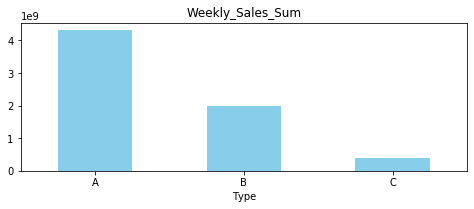

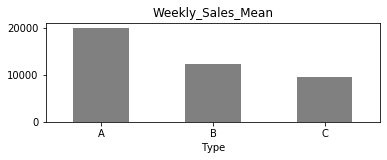

In [12]:
# Explore the relationship between different store types and sales.

plt.figure(figsize=(8,6))

plt.subplot(211)
data.groupby('Type')['Weekly_Sales'].sum().plot(kind='bar',color='skyblue',rot=360)
plt.title('Weekly_Sales_Sum')
plt.show()

plt.subplot(212)
data.groupby('Type')['Weekly_Sales'].mean().plot(kind='bar',color='gray',rot=360)
plt.title('Weekly_Sales_Mean')
plt.show()

We can see that type A stores have the highest, no matter whether it is total sales or average sales.

In [13]:
# Explore the relationship between store size and sales.

# First, the total sales of the store and the size of the store are spliced together.
store_grouped_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index().rename(columns={'Weekly_Sales':'Sum_Sales'})
data1 = pd.merge(store_grouped_sales,stores,on='Store').drop(['Type'],axis=1)
data1.head(10)

,Store,Sum_Sales,Size
0,1,2.224028e+08,151315
1,2,2.753824e+08,202307
2,3,5.758674e+07,37392
3,4,2.995440e+08,205863
4,5,4.547569e+07,34875
5,6,2.237561e+08,202505
6,7,8.159828e+07,70713
7,8,1.299512e+08,155078
8,9,7.778922e+07,125833
9,10,2.716177e+08,126512


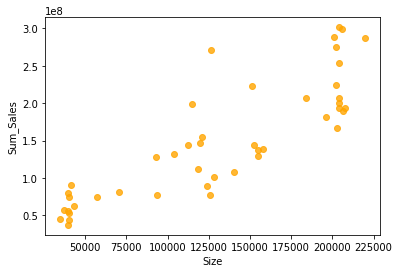

In [14]:
plt.scatter(data1['Size'],data1['Sum_Sales'],alpha=0.8,color='orange')
plt.xlabel('Size')
plt.ylabel('Sum_Sales')
plt.show()

We can see that the store size and sales are approximately proportional, that is, the larger the scale, the higher the sales.

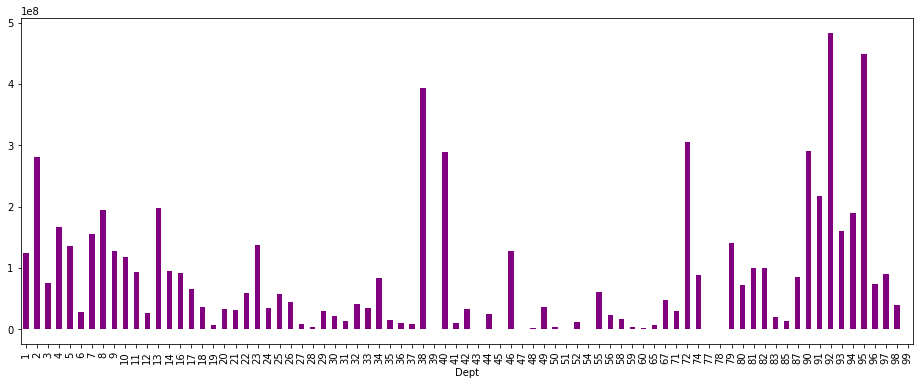

In [15]:
# Divide sales by department group.

train.groupby('Dept')['Weekly_Sales'].sum().plot(figsize=(16,6),kind='bar',color='purple',rot=90)
plt.show()

We can see that department 93 has the highest sales.

### 3. Investigate the effect of holidays on sales.

In [16]:
train.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64

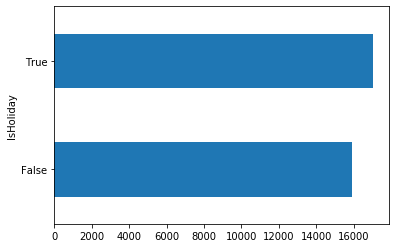

In [17]:
train.groupby('IsHoliday')['Weekly_Sales'].mean().plot(kind='barh')
plt.show()

We can see that the average sales in holiday weeks are higher than those in non-holiday weeks.

### 4.Predict total sales for November and December 2012

ARIMA is a more commonly used time series model based on historical data to make forecasts. Time series has many applications in business. For example, it can explain the seasonality in sales; it can predict the number of new or lost customers.

The full name of ARIMA is auto-regressive integrated moving average, which is mainly determined by three parameters, namely (p, d, q). Among them, auto regressive (AR(p)) means that the value of a certain time point in the regression process depends on the value of p time points in the past. For example: AR(5) or ARIMA(5,0,0) means that the current value depends on the value of 5 time points in the past.

+ The parameter d represents the order of the difference I(d), and the difference is the current value minus the previous value. Differences are mainly used to smoothen unstationary series.
+ Moving average MA(q) means that the deviation of the model is a combination of previous deviations.
+ The order q indicates that the current error depends on the previous q deviations.


In [18]:
# Group by time and calculate the total weekly sales.
grouped = train.groupby('Date')['Weekly_Sales'].sum()
grouped

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, Length: 143, dtype: float64

<Figure size 720x432 with 0 Axes>

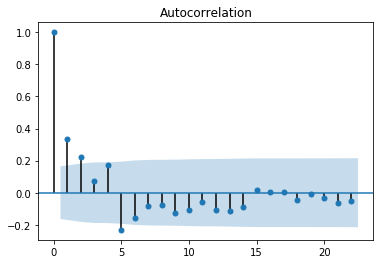

In [19]:
#Draw the autocorrelation graph.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plot_acf(grouped)
plt.show()

In [20]:
#Stationarity detection.
from statsmodels.tsa.stattools import adfuller
print('The test result of the original sequence is：',adfuller(grouped))

The test result of the original sequence is： (-5.90829795718632, 2.675979158986205e-07, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 4314.46014989216)


adfuller return value：

+ The first is the result of the adf test, which is the value of the t statistic.
+ The second is the P value of the t statistic.
+ The third is the delay order used in the calculation process.
+ The fourth is the number of observations used for adf regression and calculation.
+ The fifth is the value of the critical adf test under the 99%, 95%, and 90% confidence interval. It proves to be stable, if the first value is smaller than the fifth value. Otherwise it proves to be unstable.


ADF is less than the 3 critical values of 3 different test levels, and the p value corresponding to the unit detection statistic is significantly less than 0.05, indicating that the series can be judged as a stationary series.

Comfirm the model factorial(determine p, q)

In [21]:
# Comfirm the model factorial
from statsmodels.tsa.arima_model import ARIMA

pmax = int(len(grouped) / 50)  # factorial
qmax = int(len(grouped) / 50)
bic_matrix = []
for p in range(pmax + 1):
    temp = []
    for q in range(qmax + 1):
        try:
            value = ARIMA(grouped, (p, 0, q)).fit().bic
            temp.append(value)
        except:
            temp.append(None)
    bic_matrix.append(temp)

bic_matrix = pd.DataFrame(bic_matrix)  # transfer to data structure of the DataFrame
p, q = bic_matrix.stack().astype(float).idxmin()  # First use stack flattening, and then use idxmin to find the location of the minimum value.

print('The minimum p-value and q-value of the BIC：%s,%s' % (p, q))  # The minimum p-value and q-value of the BIC.

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model

The minimum p-value and q-value of the BIC：2,2


Confirm the model ARIMA (p , d , q )

In [22]:
from statsmodels.tsa.arima_model import ARIMA 

#Confrim the ARIMA model, ARIMA(2,0,2)
model = ARIMA(grouped,(2,0,2)).fit()
model.summary2()#create a report


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: ARMA
=======================================================================================
Model:                    ARMA                   BIC:                       4832.5408  
Dependent Variable:       Weekly_Sales           Log-Likelihood:            -2401.4    
Date:                     2021-08-24 07:57       Scale:                     1.0000     
No. Observations:         143                    Method:                    css-mle    
Df Model:                 5                      Sample:                    02-05-2010 
Df Residuals:             138                                               10-26-2012 
Converged:                1.0000                 S.D. of innovations:       4724214.665
No. Iterations:           14.0000                HQIC:                      4821.988   
AIC:                      4814.7638                                                    
---------------------------------------------------------------------------------------
                       Coef.       Std.Err.     t    P>|t|      [0.025        0.975]   
---------------------------------------------------------------------------------------
const              47113419.4903 552367.6219 85.2936 0.0000 46030798.8452 48196040.1354
ar.L1.Weekly_Sales       -0.9724      0.1385 -7.0190 0.0000       -1.2440       -0.7009
ar.L2.Weekly_Sales       -0.3647      0.1410 -2.5861 0.0097       -0.6412       -0.0883
ma.L1.Weekly_Sales        1.3943      0.0947 14.7217 0.0000        1.2087        1.5799
ma.L2.Weekly_Sales        0.8784      0.1025  8.5698 0.0000        0.6775        1.0792
------------------------------------------------------------------------------------------------------
                        Real                 Imaginary                Modulus                Frequency
------------------------------------------------------------------------------------------------------
AR.1                  -1.3330                  -0.9822                 1.6558                  -0.3989
AR.2                  -1.3330                   0.9822                 1.6558                   0.3989
MA.1                  -0.7937                  -0.7131                 1.0670                  -0.3835
MA.2                  -0.7937                   0.7131                 1.0670                   0.3835
=======================================================================================

"""

Make a forecast for the sales data for the next 10 weeks, and return the forecast result, standard error, and confidence interval.

In [23]:
model.forecast(10) 

(array([47900905.50264294, 47049302.8316195 , 46888540.71225154,
        47355482.267406  , 46960054.65089676, 47174264.88747767,
        47110190.33271877, 47094366.87773571, 47133124.45682582,
        47101207.20041807]),
 array([4724214.66544625, 5127405.8899865 , 5150612.06293633,
        5288971.6166884 , 5380932.54407732, 5406472.10254583,
        5408528.02294322, 5408727.44566192, 5409643.5415263 ,
        5410233.06864036]),
 array([[38641614.90313236, 57160196.10215352],
        [36999771.95312741, 57098833.71011159],
        [36793526.57055879, 56983554.85394429],
        [36989288.38344215, 57721676.15136985],
        [36413620.66126573, 57506488.64052778],
        [36577774.2830673 , 57770755.49188803],
        [36509670.19837444, 57710710.46706311],
        [36493455.88204503, 57695277.87342639],
        [36530417.94623458, 57735830.96741707],
        [36497345.23791534, 57705069.1629208 ]]))

In [24]:
predict_time = pd.DataFrame(['2012-11-02','2012-11-09','2012-11-16','2012-11-23','2012-11-30','2012-12-07','2012-12-14','2012-12-20','2012-12-27']).rename(columns={0:'Prediction Time'})
predict_value = pd.DataFrame(model.forecast(9)[0]).rename(columns={0:'Sales Amount'})

result = pd.concat([predict_time,predict_value],axis=1)
result

,Prediction Time,Sales Amount
0,2012-11-02,4.790091e+07
1,2012-11-09,4.704930e+07
2,2012-11-16,4.688854e+07
3,2012-11-23,4.735548e+07
4,2012-11-30,4.696005e+07
5,2012-12-07,4.717426e+07
6,2012-12-14,4.711019e+07
7,2012-12-20,4.709437e+07
8,2012-12-27,4.713312e+07


In [26]:
sum_month_11 = result.loc[0:4,'Sales Amount'].sum()
sum_month_12 = result.loc[5:8,'Sales Amount'].sum()
print(sum_month_11,'\n',sum_month_12)

236154285.96481672 
 188511946.55475798


Therefore, according to the ARIMA model forecast, the sale amount in November are 236154287 and the sale amount in December are 188511946.

    I think the best algorithm is ARIMA. It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration. As for this test, it probability is over-fitting if ther is more seasonal feature. Firstly, I separate the data based on time characteristics. Secondly, according to the obtained features, I use the ARIMA model, which is an algorithm model related to continuous time features. Finally, according to the obtained time data and corresponding sales data, I calculated the best parameters required by the model. Finally, through these models and parameters, forecast the sales amounts in November and December.

    The logic of this algorithm is that we can calculate the key parameters of the algorithm model through the existing continuous time characteristics. This is similar to the training steps in machine learning algorithms. This step is to obtain the best model parameters for the known data. After that, for the prediction of unknown data, we can take the best parameters for simulation to achieve the best results. This algorithm must first ensure that the previous data is very closely related to time. As long as the time data is sufficiently complete, the predicted data is also perfect.

    For this test, I have other suggestions. I think it can also be predicted by the SARIMA algorithm.The full name of SARIMA algorithm is Seasonal Autoregressive Integrated Moving-Average. This algorithm can predict data through seasonal data changes. In this data set, we can see that the "holiday" data interferes with the data prediction. So I guess that by separating the "holiday" data, adding a feature of "off season" and "peak season", so can better obtain forecast data.